In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### SIR model

This system of ODEs models the spread of disease (Smith)

$$ \begin{aligned}\frac{dS}{dt}  = & \delta N - \delta S - \gamma k IS \\ \frac{dI}{dt} = & \> \gamma k IS - (r+\delta) I \\ \frac{dR}{dt} = & \> rI - \delta R,\end{aligned} $$ 

where $S(t), I(t)$, and $R(t)$ represent the susceptible, infectious, and recovered in a population of size $N$. We take 
+ the initial state to be $S(0) = 900, I(0) = 100, R(0) = 0$ 
+ the parameters $(\delta, \gamma, r) = (0.5,0.015,0.5)$ and $k=1$
+ Total population $N = 1000$

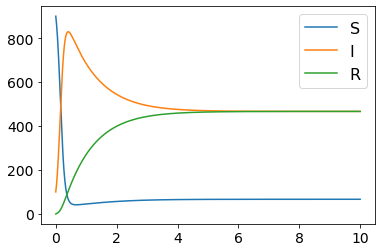

In [2]:
def sir(t, y):
    delta = 0.5; gamma = 0.015; r = 0.5
    N = 1000
    return np.array([delta*(N-y[0]) - gamma*y[1]*y[0], gamma*y[1]*y[0] -(r+delta)*y[1],  r*y[1] - delta*y[2]])

from scipy.integrate import solve_ivp

x0 = np.array([900,100,0])
sol = solve_ivp(sir,  [0,10], x0, method = 'RK45', t_eval = np.linspace(0,10,10000), atol = 1.e-8, rtol = 1.e-8 )


teval = sol['t']
xeval = sol['y']

plt.plot(teval, xeval.T)
plt.legend(('S','I', 'R'), fontsize = 16)

In [3]:
print('Status of the solver is ', sol['status'])
print('Number of function evaluations is', sol['nfev'])

Status of the solver is  0
Number of function evaluations is 908


### Stiff system

The following ODE system models a ruby laser oscillator (Byrne and Hindmarsh)

$$ \begin{aligned} \frac{dn}{dt} = & -n(\alpha\phi + \beta)  + \gamma \\ \frac{d\phi}{dt} = & \> \phi (\rho n - \sigma ) + \tau (1 + n) \end{aligned} $$

where the parameters are 
$$ \alpha = 1.5\times 10^{-18}, \beta = 2.5\times 10^{-6}, \gamma = 2.1 \times 10^{-6}, \rho = 0.6, \sigma = 0.18, \tau = 0.016, $$

and the initial conditions are $n(0) = -1$ and $\phi(0) = 0.$


In [4]:
def f(t, x):
    #Constants in the model
    alpha = 1.5*10**(-18)
    beta  = 2.5*10**(-6)
    gamma = 2.1*10**(-6)
    rho   = 0.6
    sigma = 0.18
    tau   = 0.016
    
    return np.array([-x[0]*(alpha*x[1] + beta) + gamma, x[1]*(rho*x[0]-sigma) + tau*(1+x[0])])


#### RK45

CPU times: user 6.35 s, sys: 91.1 ms, total: 6.44 s
Wall time: 6.51 s
Status of the solver is  0


Text(0.5, 1.0, 'Photon density')

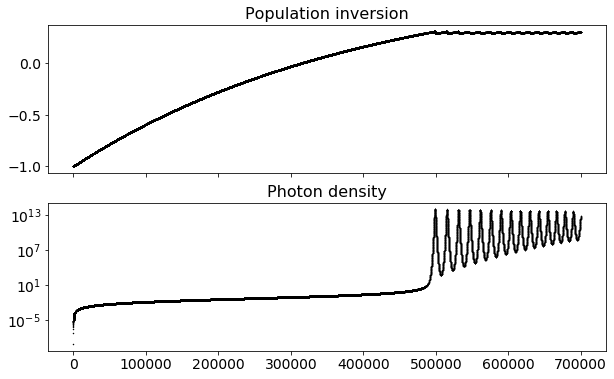

In [15]:
from scipy.integrate import solve_ivp

x0 = np.array([-1,0])
%time sol = solve_ivp(f,  [0,7e5], x0, method = 'RK45', atol = 1.e-8, rtol = 1.e-8 )


teval = sol['t']
xeval = sol['y']
print('Status of the solver is ', sol['status'])

fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = (10,6))
ax1.plot(teval, xeval[0,:], 'ks', markersize = 0.5)
ax1.set_title('Population inversion', fontsize = 16)
ax2.semilogy(teval, xeval[1,:], 'ks', markersize = 0.5)
ax2.set_title('Photon density', fontsize = 16)

In [6]:
print('Status of the solver is ', sol['status'])
print('Number of function evaluations is', sol['nfev'])
print('Number of Jacobian evaluations is', sol['njev'])
print('Number of LU Decompositions is', sol['nlu'])

Status of the solver is  0
Number of function evaluations is 383456
Number of Jacobian evaluations is 0
Number of LU Decompositions is 0


#### RK23

CPU times: user 10.3 s, sys: 18.8 ms, total: 10.3 s
Wall time: 10.3 s
Status of the solver is  0


Text(0.5, 1.0, 'Photon density')

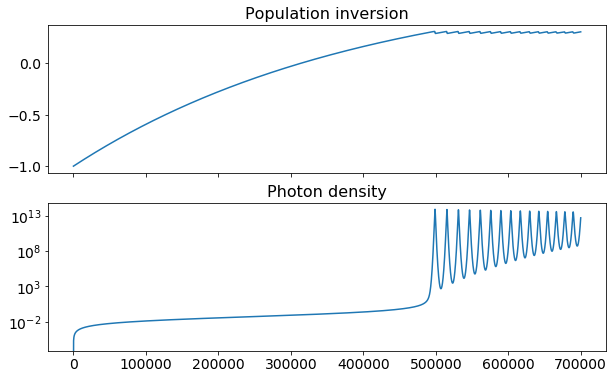

In [7]:
x0 = np.array([-1,0])
%time sol = solve_ivp(f,  [0,7e5], x0, method = 'RK23', t_eval = np.linspace(0,7e5,10000), atol = 1.e-8, rtol = 1.e-8 )


teval = sol['t']
xeval = sol['y']
print('Status of the solver is ', sol['status'])

fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = (10,6))
ax1.plot(teval, xeval[0,:])
ax1.set_title('Population inversion', fontsize = 16)
ax2.semilogy(teval, xeval[1,:])
ax2.set_title('Photon density', fontsize = 16)

In [8]:
print('Status of the solver is ', sol['status'])
print('Number of function evaluations is', sol['nfev'])
print('Number of Jacobian evaluations is', sol['njev'])
print('Number of LU Decompositions is', sol['nlu'])

Status of the solver is  0
Number of function evaluations is 468404
Number of Jacobian evaluations is 0
Number of LU Decompositions is 0


#### BDF

CPU times: user 3.8 s, sys: 7.67 ms, total: 3.81 s
Wall time: 3.81 s
Status of the solver is  0


Text(0.5, 1.0, 'Photon density')

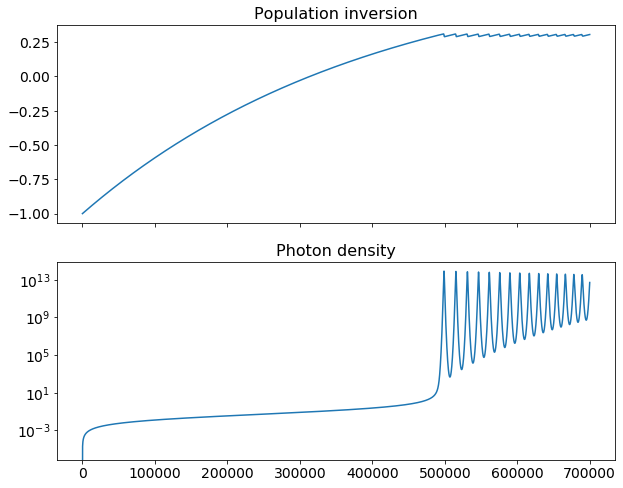

In [9]:
x0 = np.array([-1,0])
%time sol = solve_ivp(f,  [0,7e5], x0, method = 'BDF', t_eval = np.linspace(0,7e5,10000), atol = 1.e-8, rtol = 1.e-8 )


teval = sol['t']
xeval = sol['y']
print('Status of the solver is ', sol['status'])

fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = (10,8))
ax1.plot(teval, xeval[0,:])
ax1.set_title('Population inversion', fontsize = 16)
ax2.semilogy(teval, xeval[1,:])
ax2.set_title('Photon density', fontsize = 16)

In [10]:
print('Status of the solver is ', sol['status'])
print('Number of function evaluations is', sol['nfev'])
print('Number of Jacobian evaluations is', sol['njev'])
print('Number of LU Decompositions is', sol['nlu'])

Status of the solver is  0
Number of function evaluations is 39145
Number of Jacobian evaluations is 100
Number of LU Decompositions is 2466


#### LSODA 

CPU times: user 434 ms, sys: 13 ms, total: 447 ms
Wall time: 444 ms
Status of the solver is  0


Text(0.5, 1.0, 'Photon density')

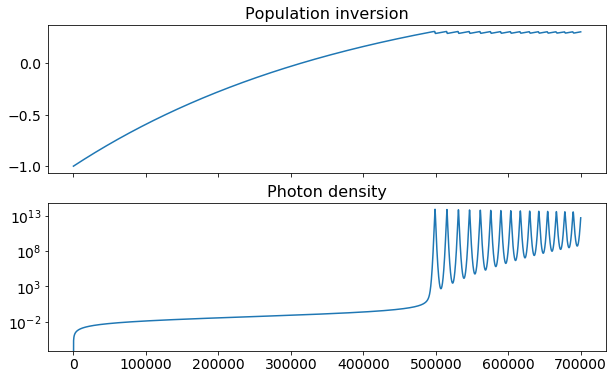

In [11]:
x0 = np.array([-1,0])
%time sol = solve_ivp(f,  [0,7e5], x0, method = 'LSODA', t_eval = np.linspace(0,7e5,10000), atol = 1.e-8, rtol = 1.e-8 )


teval = sol['t']
xeval = sol['y']
print('Status of the solver is ', sol['status'])

fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = (10,6))
ax1.plot(teval, xeval[0,:])
ax1.set_title('Population inversion', fontsize = 16)
ax2.semilogy(teval, xeval[1,:])
ax2.set_title('Photon density', fontsize = 16)

In [12]:
print('Status of the solver is ', sol['status'])
print('Number of function evaluations is', sol['nfev'])
print('Number of Jacobian evaluations is', sol['njev'])
print('Number of LU Decompositions is', sol['nlu'])


Status of the solver is  0
Number of function evaluations is 17844
Number of Jacobian evaluations is 820
Number of LU Decompositions is 820
